In [1]:
!pwd

/Users/hamiddimyati/Documents/codes/II2202_Stacking-Regression-Comparative-Study/notebooks


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

/Users/hamiddimyati/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dir = "/Users/hamiddimyati/Documents/codes/II2202_Stacking-Regression-Comparative-Study"

# EDA Seoul Bike Data

In [4]:
seoul_bike = pd.read_csv(dir + "/data/SeoulBikeData.csv", header=0, encoding= 'unicode_escape')

In [5]:
seoul_bike['Date'] = pd.to_datetime(seoul_bike['Date'])

In [6]:
seoul_bike['Date'] += pd.to_timedelta(seoul_bike['Hour'], unit='h')

In [7]:
seoul_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [8]:
seoul_bike

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12 00:00:00,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12 01:00:00,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12 02:00:00,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12 03:00:00,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12 04:00:00,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30 19:00:00,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30 20:00:00,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30 21:00:00,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30 22:00:00,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Univariate Analysis

#### Dependent Variable

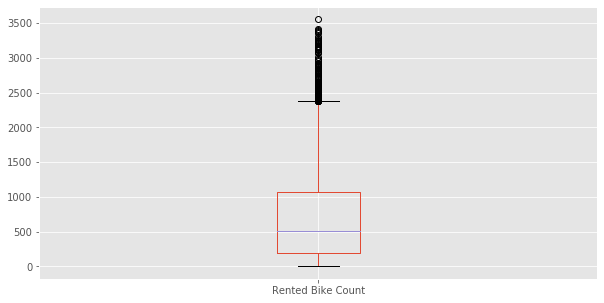

In [9]:
seoul_bike['Rented Bike Count'].plot.box(figsize=(10,5))

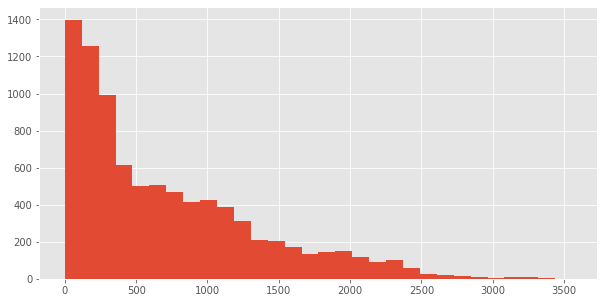

In [14]:
seoul_bike['Rented Bike Count'].hist(bins=30, figsize=(10,5))

#### Independent Variable

In [17]:
seoul_bike.describe(include='datetime')

,Date
count,8760
unique,8760
top,2018-02-17 08:00:00
freq,1
first,2017-01-12 00:00:00
last,2018-12-11 23:00:00


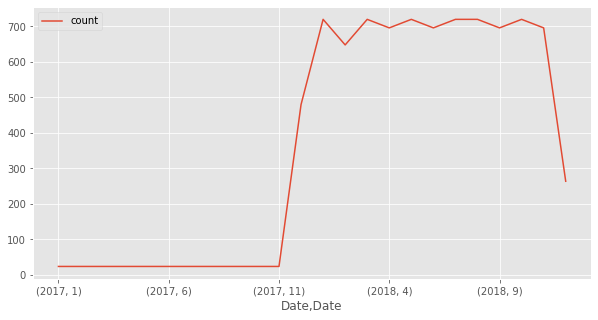

In [18]:
seoul_bike.groupby([seoul_bike['Date'].dt.year, seoul_bike['Date'].dt.month])['Date'].agg({'count'}).plot(figsize=(10,5))

In [19]:
seoul_bike.describe(include='object')

,Seasons,Holiday,Functioning Day
count,8760,8760,8760
unique,4,2,2
top,Spring,No Holiday,Yes
freq,2208,8328,8465


In [20]:
seoul_bike.groupby('Seasons')['Seasons'].agg('count')

Seasons
Autumn    2184
Spring    2208
Summer    2208
Winter    2160
Name: Seasons, dtype: int64

In [21]:
seoul_bike.groupby('Holiday')['Holiday'].agg('count')

Holiday
Holiday        432
No Holiday    8328
Name: Holiday, dtype: int64

In [22]:
seoul_bike.groupby('Functioning Day')['Functioning Day'].agg('count')

Functioning Day
No      295
Yes    8465
Name: Functioning Day, dtype: int64

In [47]:
seoul_bike.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Text(0.5, 1.0, 'Snowfall (cm)')

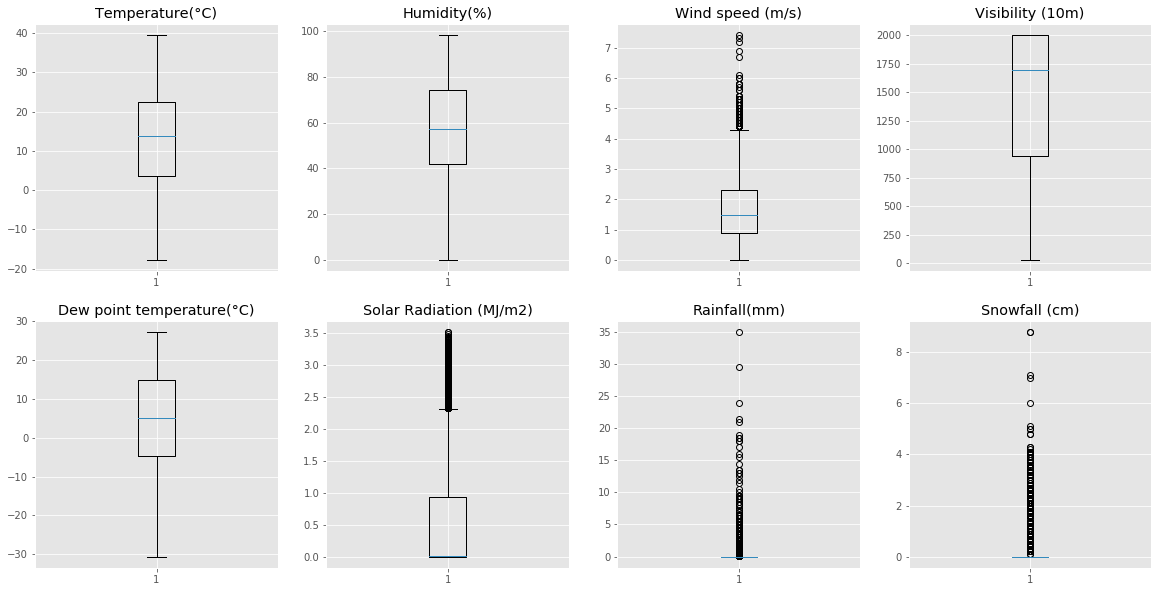

In [35]:
fig, ax = plt.subplots(2, 4, figsize=(20,10))
ax[0,0].boxplot(seoul_bike['Temperature(°C)'])
ax[0,0].set_title('Temperature(°C)')
ax[0,1].boxplot(seoul_bike['Humidity(%)'])
ax[0,1].set_title('Humidity(%)')
ax[0,2].boxplot(seoul_bike['Wind speed (m/s)'])
ax[0,2].set_title('Wind speed (m/s)')
ax[0,3].boxplot(seoul_bike['Visibility (10m)'])
ax[0,3].set_title('Visibility (10m)')
ax[1,0].boxplot(seoul_bike['Dew point temperature(°C)'])
ax[1,0].set_title('Dew point temperature(°C)')
ax[1,1].boxplot(seoul_bike['Solar Radiation (MJ/m2)'])
ax[1,1].set_title('Solar Radiation (MJ/m2)')
ax[1,2].boxplot(seoul_bike['Rainfall(mm)'])
ax[1,2].set_title('Rainfall(mm)')
ax[1,3].boxplot(seoul_bike['Snowfall (cm)'])
ax[1,3].set_title('Snowfall (cm)')

Text(0.5, 1.0, 'Snowfall (cm)')

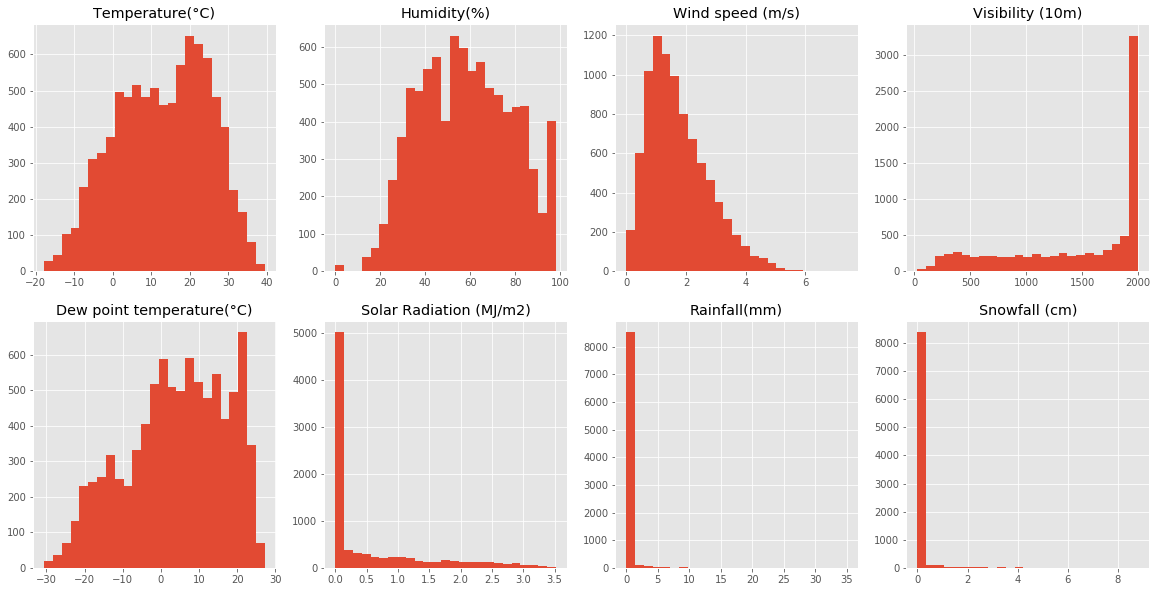

In [39]:
fig, ax = plt.subplots(2, 4, figsize=(20,10))
ax[0,0].hist(seoul_bike['Temperature(°C)'], bins=25)
ax[0,0].set_title('Temperature(°C)')
ax[0,1].hist(seoul_bike['Humidity(%)'], bins=25)
ax[0,1].set_title('Humidity(%)')
ax[0,2].hist(seoul_bike['Wind speed (m/s)'], bins=25)
ax[0,2].set_title('Wind speed (m/s)')
ax[0,3].hist(seoul_bike['Visibility (10m)'], bins=25)
ax[0,3].set_title('Visibility (10m)')
ax[1,0].hist(seoul_bike['Dew point temperature(°C)'], bins=25)
ax[1,0].set_title('Dew point temperature(°C)')
ax[1,1].hist(seoul_bike['Solar Radiation (MJ/m2)'], bins=25)
ax[1,1].set_title('Solar Radiation (MJ/m2)')
ax[1,2].hist(seoul_bike['Rainfall(mm)'], bins=25)
ax[1,2].set_title('Rainfall(mm)')
ax[1,3].hist(seoul_bike['Snowfall (cm)'], bins=25)
ax[1,3].set_title('Snowfall (cm)')

### Bivariate Analysis

<Figure size 432x288 with 0 Axes>

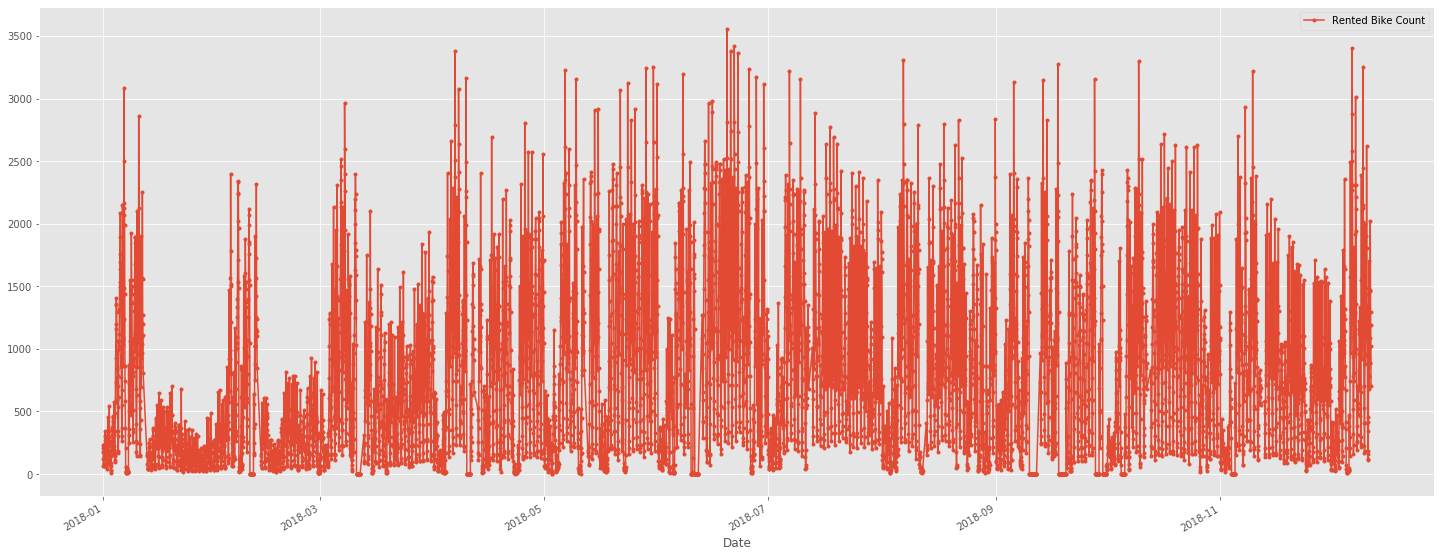

In [40]:
plt.figure()
seoul_bike[seoul_bike['Date']>='2018-01-01'].plot(x='Date', y='Rented Bike Count', marker='.', figsize=(25,10))

<Figure size 432x288 with 0 Axes>

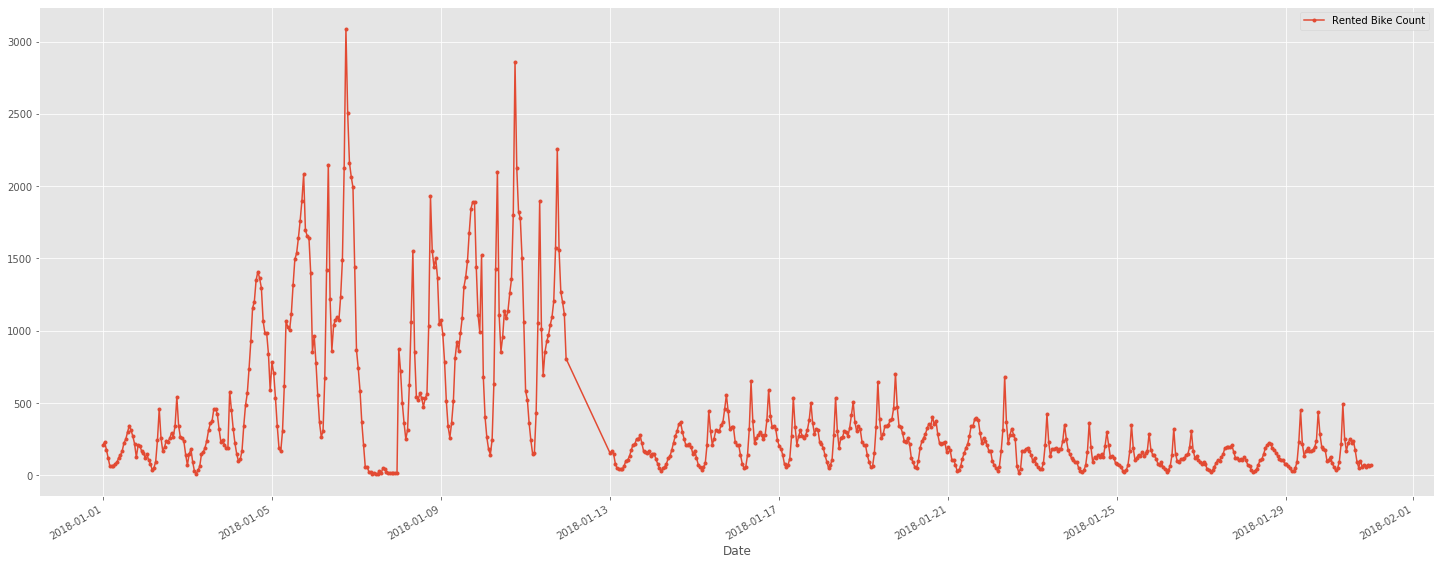

In [42]:
plt.figure()
seoul_bike[seoul_bike['Date'].between('2018-01-01', '2018-01-31')].plot(x='Date', y='Rented Bike Count', marker='.', figsize=(25,10))

<Figure size 432x288 with 0 Axes>

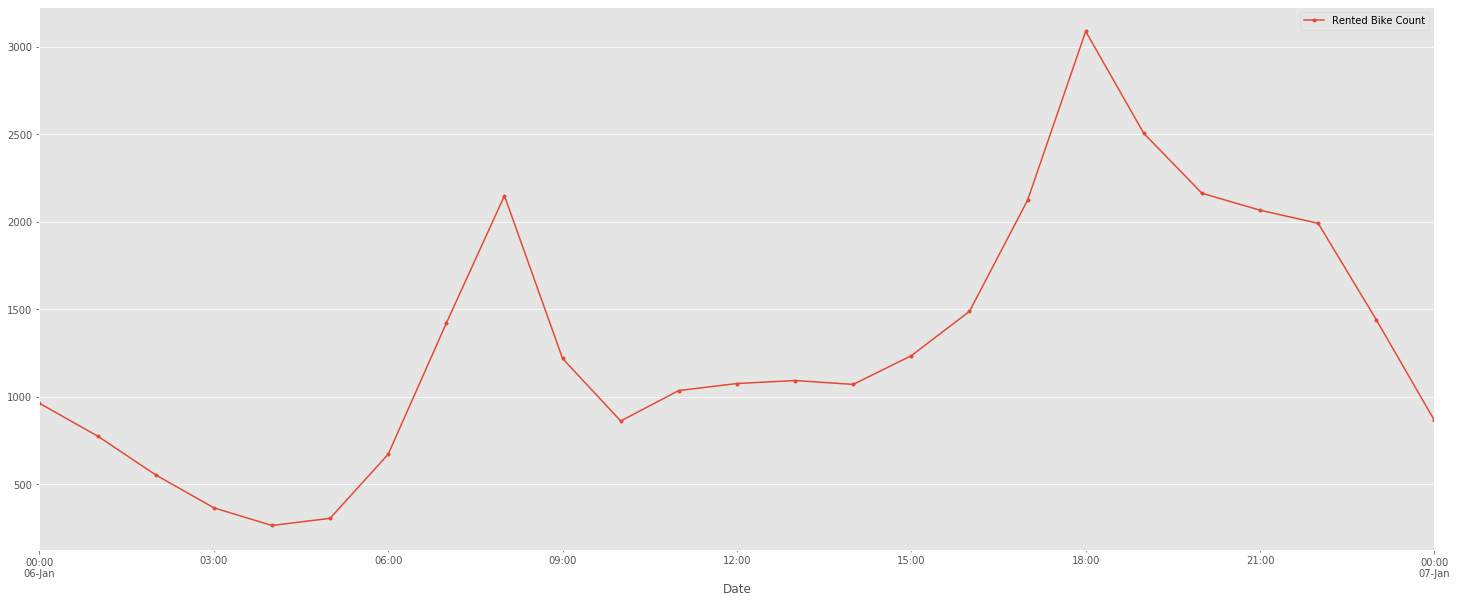

In [44]:
plt.figure()
seoul_bike[seoul_bike['Date'].between('2018-01-06', '2018-01-07')].plot(x='Date', y='Rented Bike Count', marker='.', figsize=(25,10))

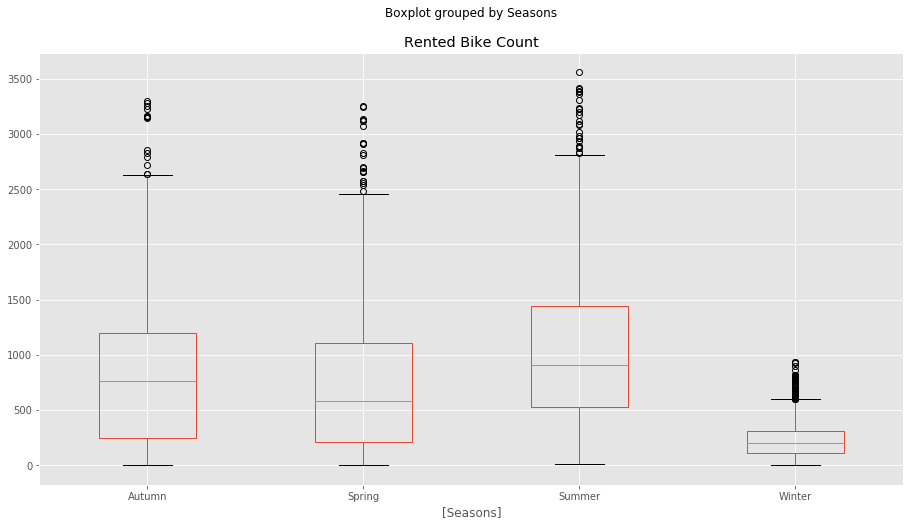

In [48]:
seoul_bike.boxplot(column=['Rented Bike Count'], by=['Seasons'], figsize=(15,8))

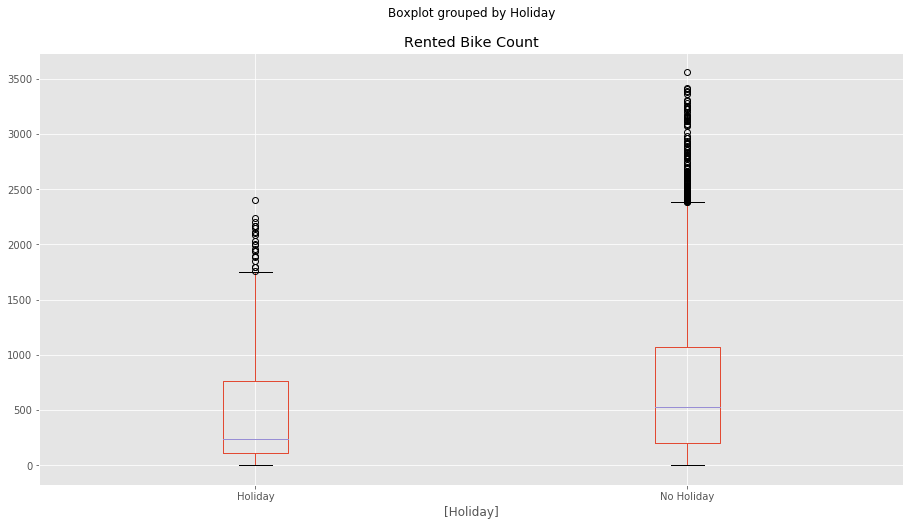

In [49]:
seoul_bike.boxplot(column=['Rented Bike Count'], by=['Holiday'], figsize=(15,8))

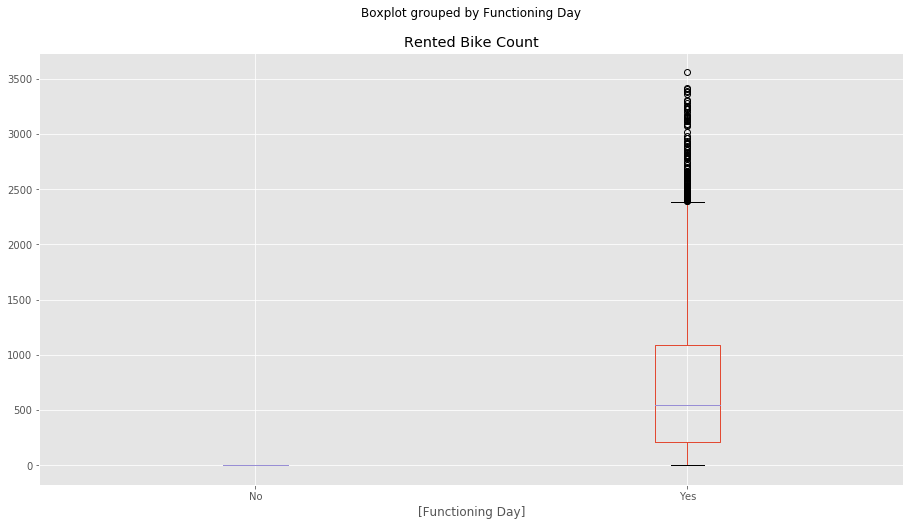

In [50]:
seoul_bike.boxplot(column=['Rented Bike Count'], by=['Functioning Day'], figsize=(15,8))

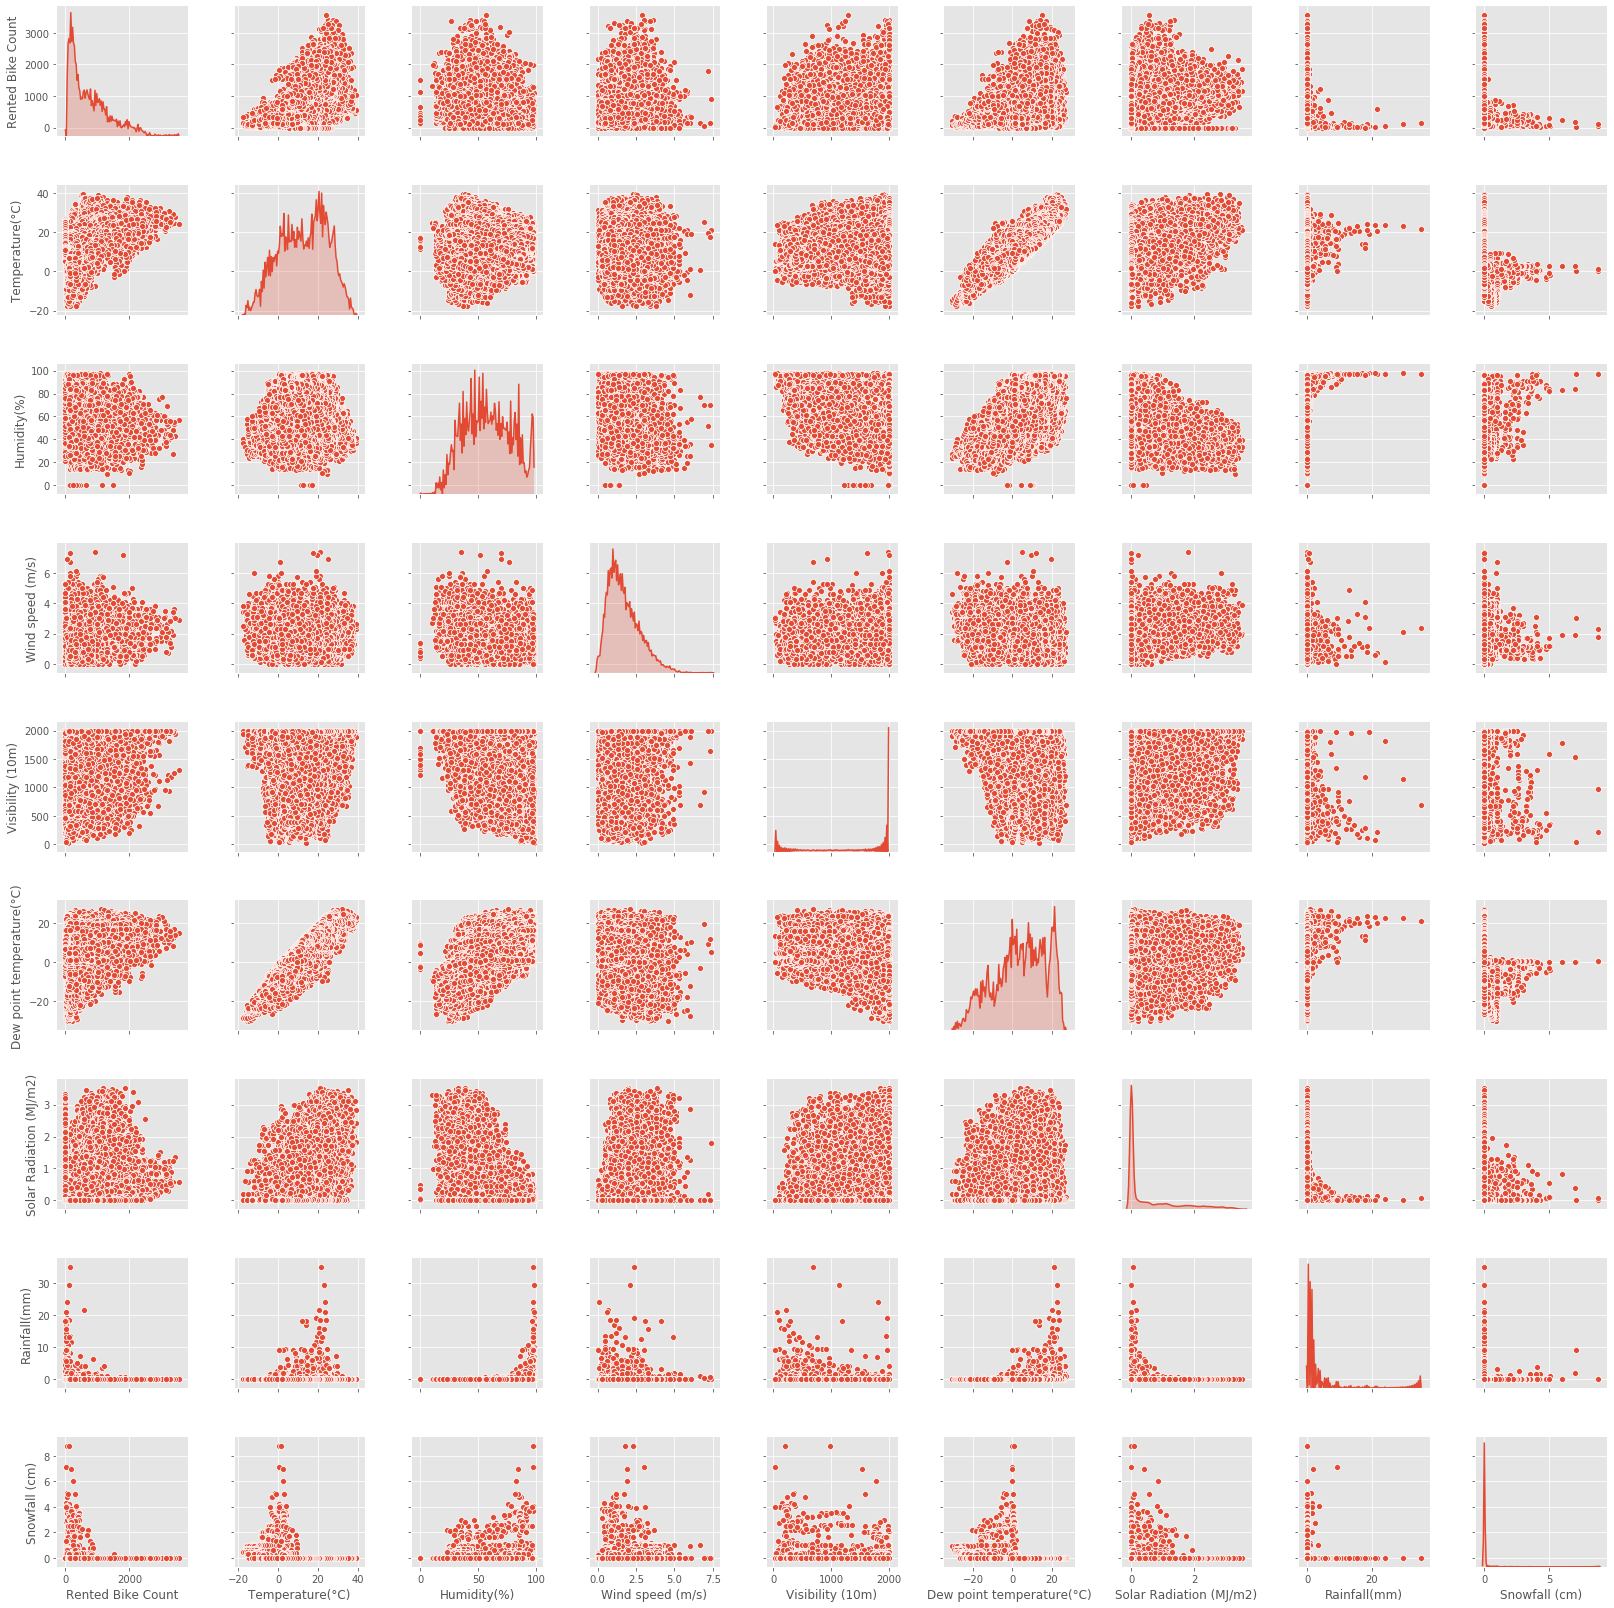

In [52]:
cols = ['Rented Bike Count','Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
sns.pairplot(seoul_bike[cols], diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False) )